In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
songs = pd.read_csv('song_data.csv')
songs.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [3]:
songs.describe

<bound method NDFrame.describe of                         song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520    

In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
songs.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [6]:
songs.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

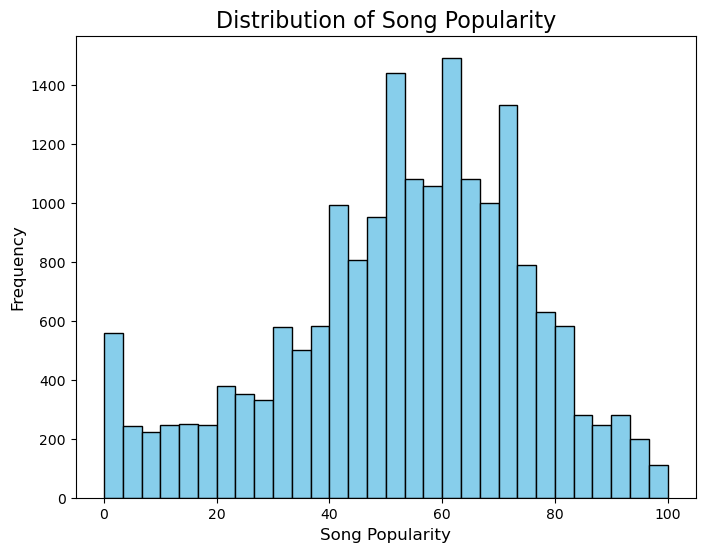

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(songs['song_popularity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Popularity', fontsize=16)
plt.xlabel('Song Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


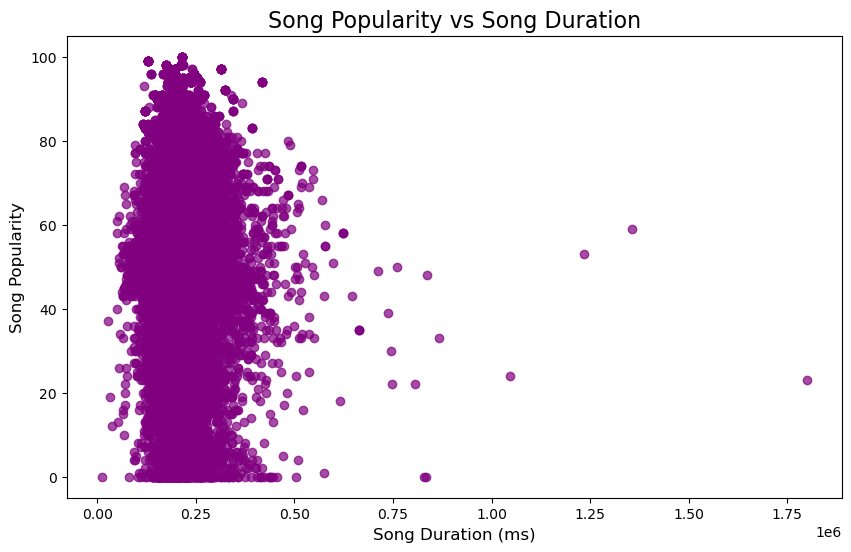

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(songs['song_duration_ms'], songs['song_popularity'], alpha=0.7, color='purple')
plt.title('Song Popularity vs Song Duration', fontsize=16)
plt.xlabel('Song Duration (ms)', fontsize=12)
plt.ylabel('Song Popularity', fontsize=12)
plt.show()


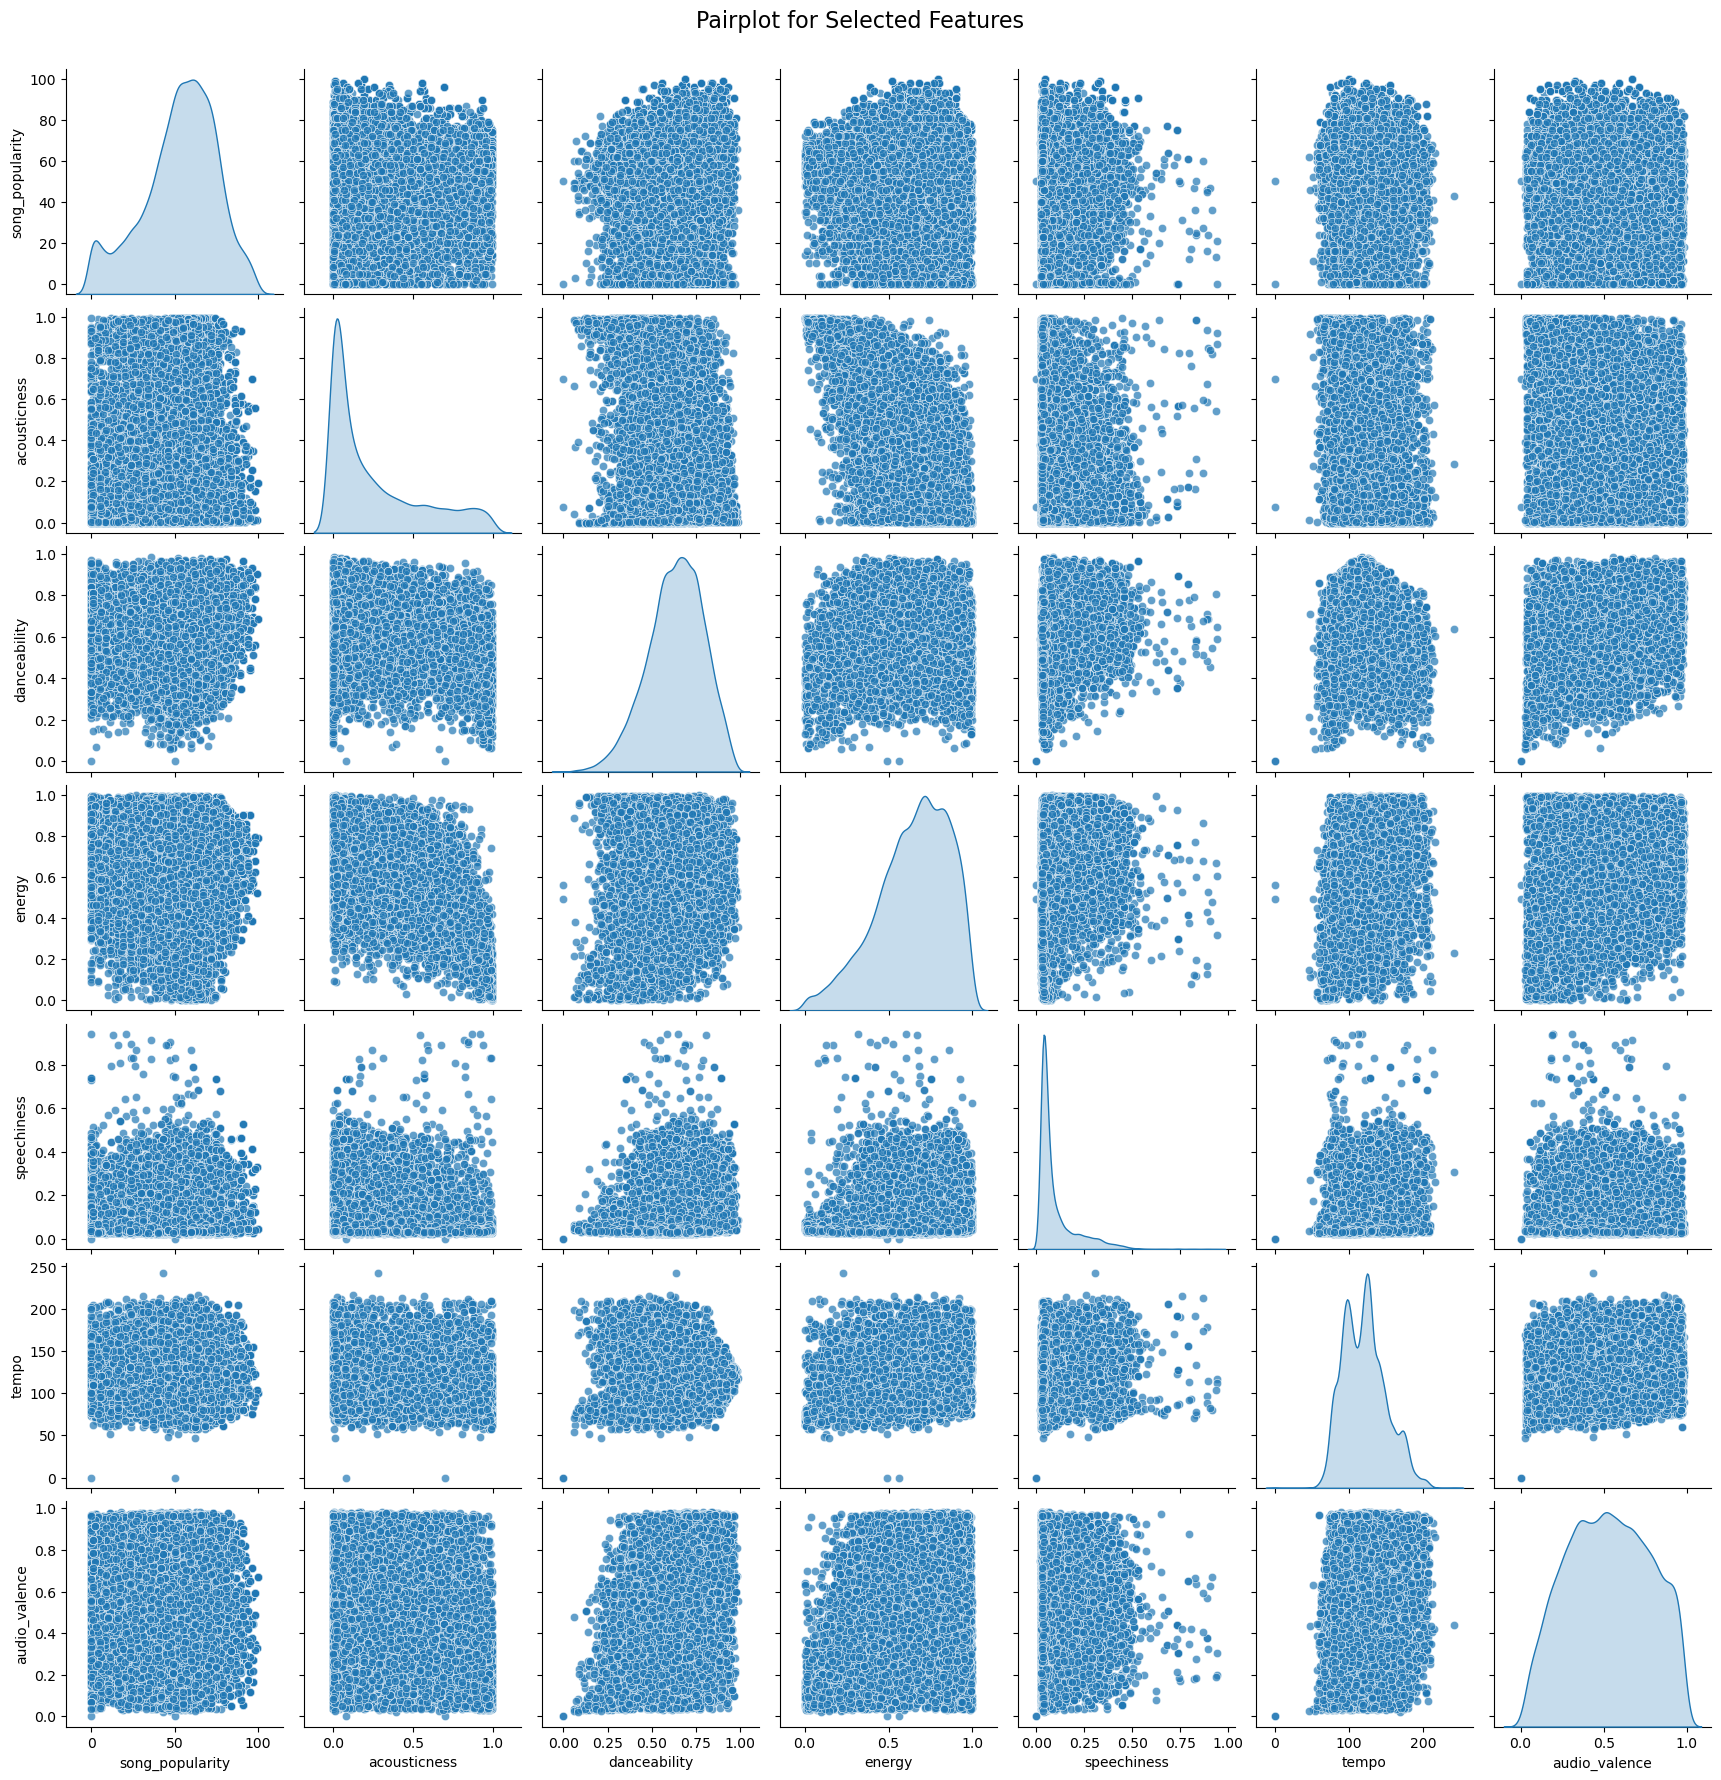

In [9]:
import seaborn as sns

selected_columns = ['song_popularity', 'acousticness', 'danceability', 'energy', 'speechiness', 'tempo', 'audio_valence']
sns.pairplot(songs[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot for Selected Features', y=1.02, fontsize=16)
plt.show()


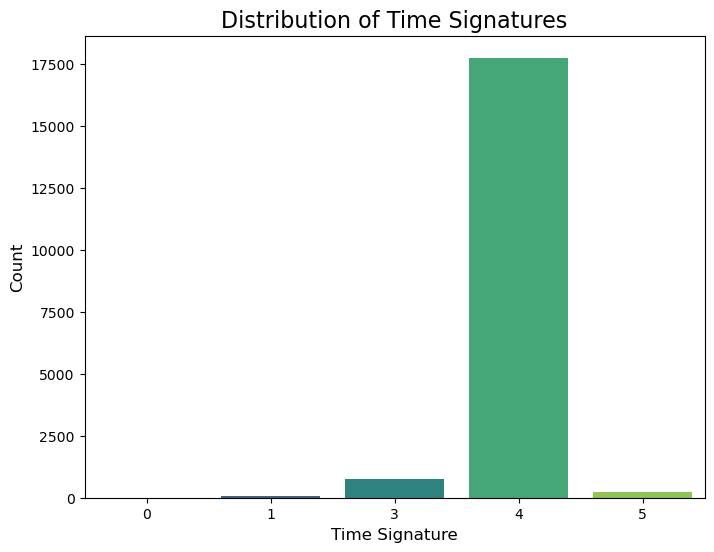

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=songs, x='time_signature', palette='viridis')
plt.title('Distribution of Time Signatures', fontsize=16)
plt.xlabel('Time Signature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


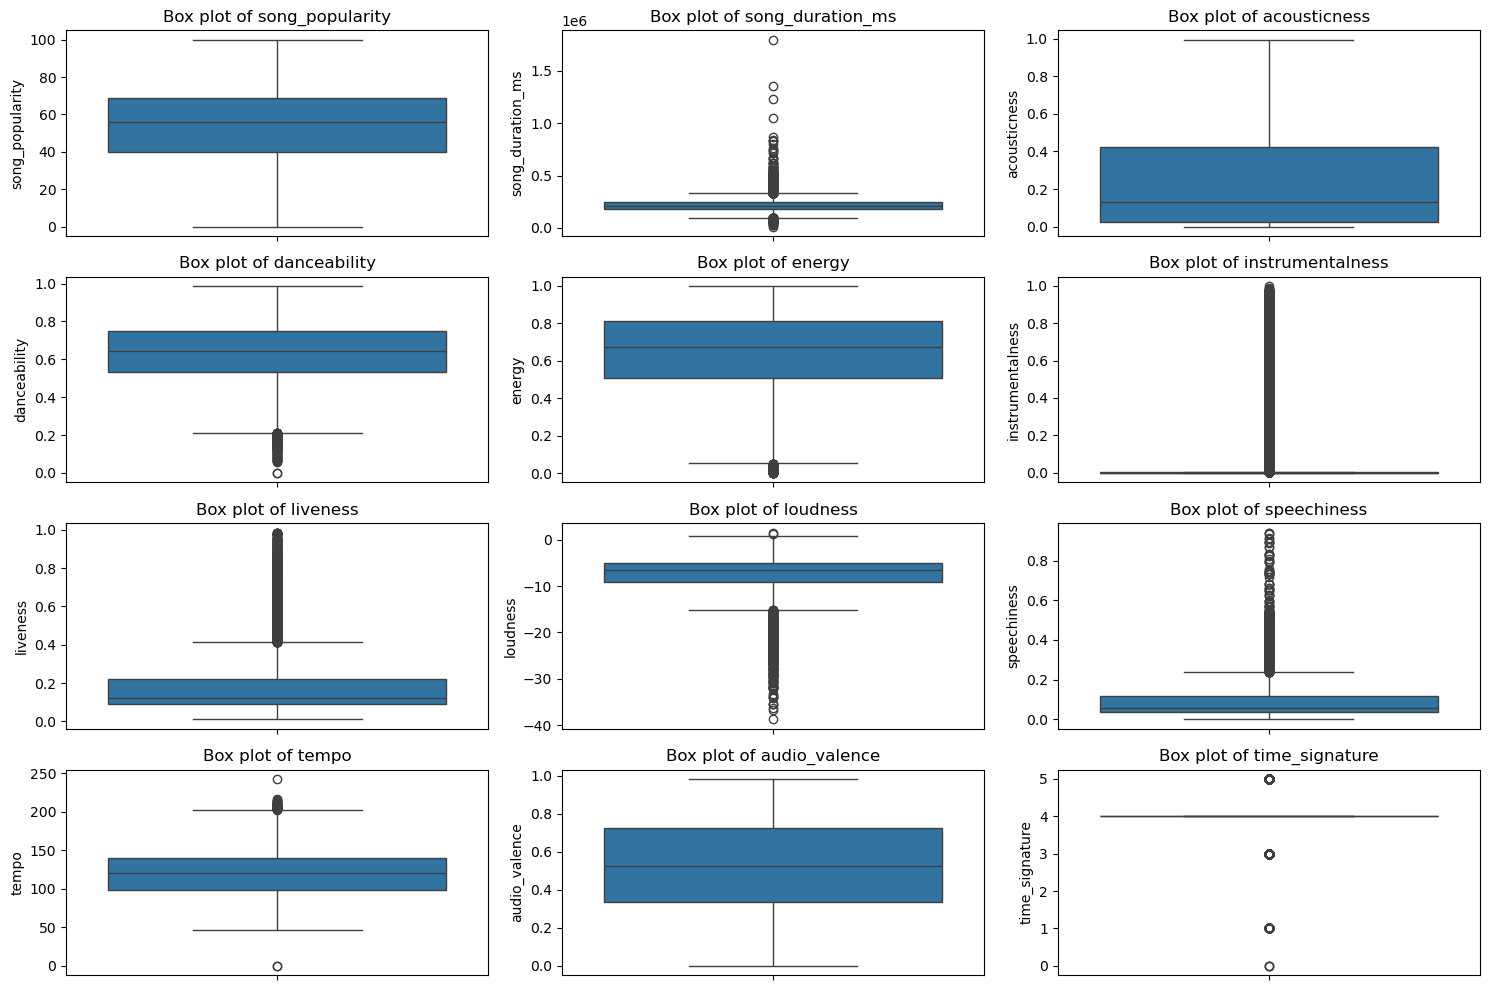

In [12]:

# Define numeric columns
numeric_cols = [
    'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 
    'tempo', 'audio_valence','time_signature'
]

# Set up a grid of plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=songs[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


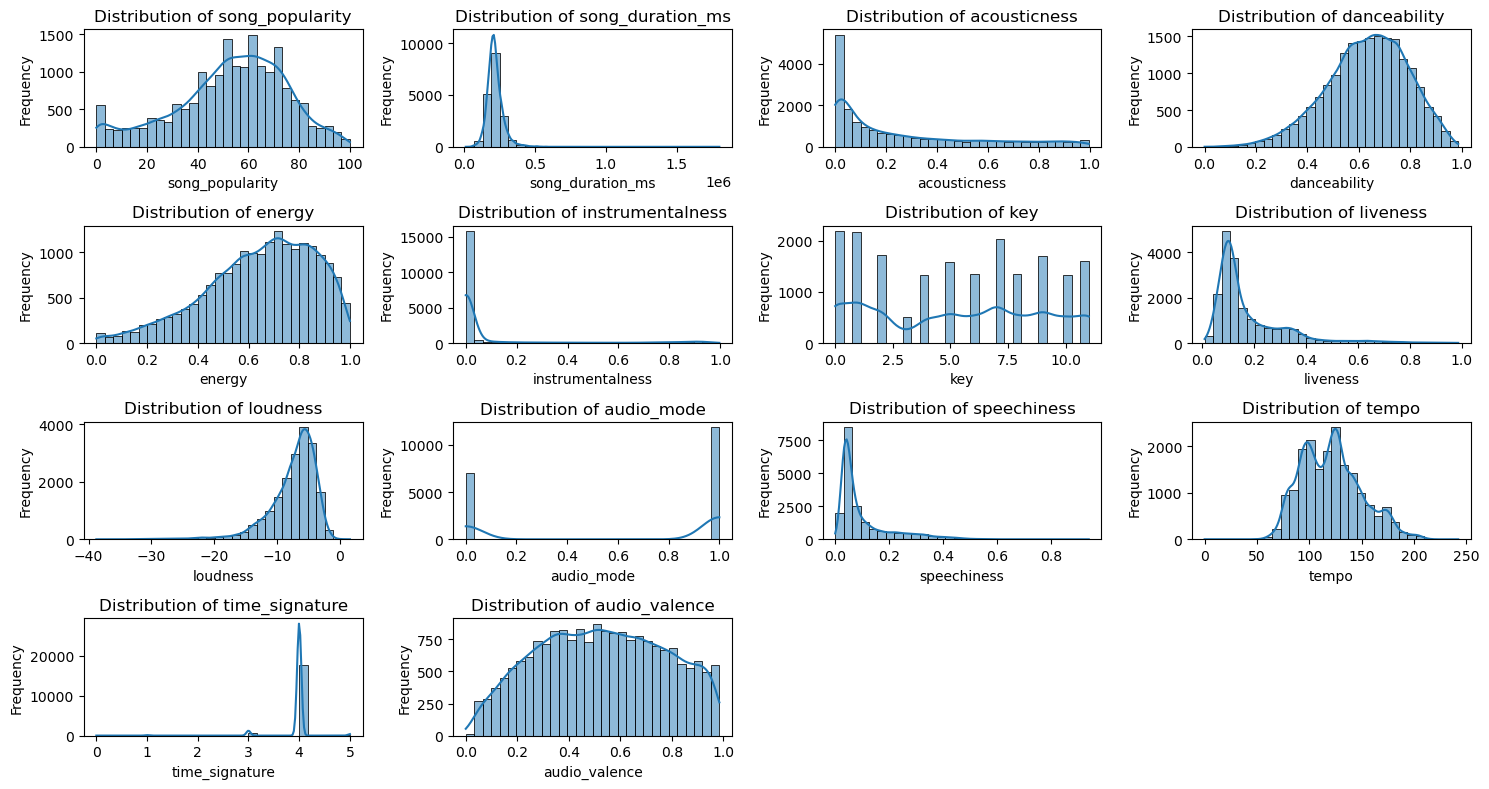

In [13]:
# Select all columns except 'song_name' 
columns_to_check = [col for col in songs.columns if col != 'song_name']

# Plot histograms for all selected columns
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 4, i)  # 4x4 grid for subplots (adjust grid size based on number of columns)
    sns.histplot(songs[column], bins=30, kde=True)  # kde=True adds a density plot
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


In [14]:
# Apply Yeo-Johnson transformation (handles both positive and negative values)
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# Features to transform
features_to_transform = ['song_duration_ms', 'acousticness', 'instrumentalness', 
                         'liveness', 'loudness', 'speechiness', 'time_signature']

# Apply transformations
songs[features_to_transform] = transformer.fit_transform(songs[features_to_transform])

# Log transform moderately skewed features (where applicable)
songs['acousticness'] = np.log1p(songs['acousticness'])

print(songs.head())


                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73         25.140069   
1                  In The End               66         24.470776   
2           Seven Nation Army               76         24.701761   
3                  By The Way               74         24.470776   
4           How You Remind Me               56         24.580062   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005446         0.496   0.682          0.000029    8  0.047099   
1      0.010047         0.542   0.853         -0.000000    3  0.073026   
2      0.008010         0.737   0.463          0.065955    0  0.113291   
3      0.024792         0.451   0.970          0.003451    0  0.070338   
4      0.000952         0.447   0.766         -0.000000   10  0.075178   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0 -1.592072           1     0.024381  167.060      244.922549      

In [15]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  float64
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  float64
 14  audio_valence     18835 non-null  float64
dtypes: float64(11), int64(3), object(1)
memory usage: 2.2+ MB


In [16]:
skewness = songs[columns_to_check].skew()
# Display skewness values
print("Skewness of features:")
print(skewness)

Skewness of features:
song_popularity    -0.501487
song_duration_ms    0.034660
acousticness        0.245243
danceability       -0.391719
energy             -0.620738
instrumentalness    1.903835
key                -0.002520
liveness            0.318681
loudness            0.040209
audio_mode         -0.530308
speechiness         0.590501
tempo               0.442855
time_signature      1.325350
audio_valence      -0.016423
dtype: float64


<Axes: >

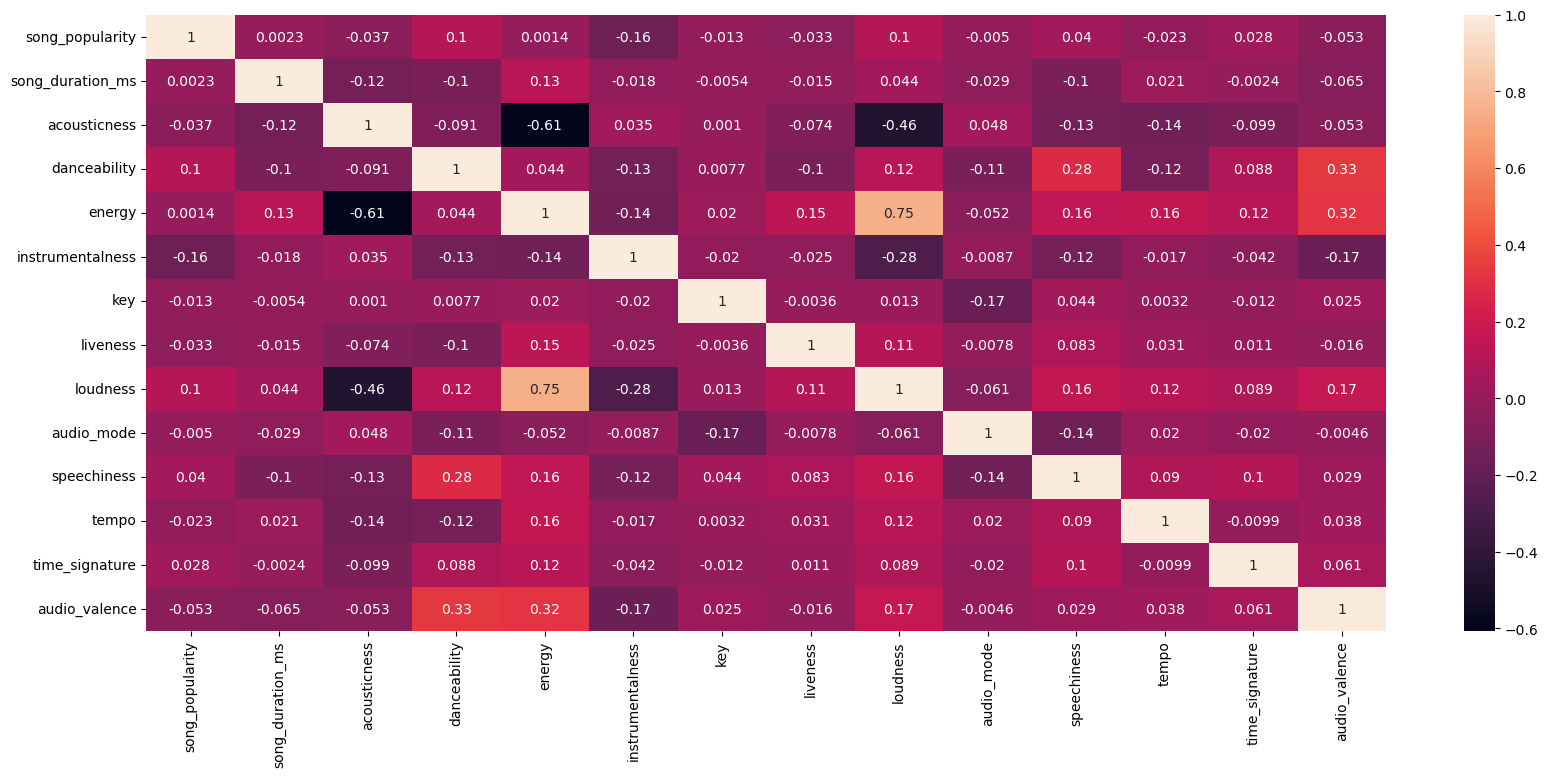

In [17]:
correlations=songs[columns_to_check].corr()
f, ax = plt.subplots(figsize = (20, 8))
sns.heatmap(correlations,annot=True)

In [18]:
print(correlations)

                  song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000          0.002349     -0.037184   
song_duration_ms         0.002349          1.000000     -0.124012   
acousticness            -0.037184         -0.124012      1.000000   
danceability             0.104290         -0.099908     -0.090754   
energy                   0.001365          0.127102     -0.606231   
instrumentalness        -0.156430         -0.017701      0.035330   
key                     -0.013160         -0.005425      0.001025   
liveness                -0.032788         -0.014830     -0.073626   
loudness                 0.103981          0.044098     -0.457706   
audio_mode              -0.004969         -0.028652      0.047806   
speechiness              0.040034         -0.104842     -0.129162   
tempo                   -0.022672          0.021164     -0.142443   
time_signature           0.028331         -0.002390     -0.099251   
audio_valence           -0.052895 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(songs.drop(columns=['song_popularity','song_name']))  # Remove target variable before scaling


In [20]:
songs['loudness_energy_interaction'] = songs['loudness'] * songs['energy']


In [21]:
songs = pd.get_dummies(songs, columns=['key', 'audio_mode'], drop_first=True)


In [22]:
songs.isnull().sum()  # Check for missing values


song_name                      0
song_popularity                0
song_duration_ms               0
acousticness                   0
danceability                   0
energy                         0
instrumentalness               0
liveness                       0
loudness                       0
speechiness                    0
tempo                          0
time_signature                 0
audio_valence                  0
loudness_energy_interaction    0
key_1                          0
key_2                          0
key_3                          0
key_4                          0
key_5                          0
key_6                          0
key_7                          0
key_8                          0
key_9                          0
key_10                         0
key_11                         0
audio_mode_1                   0
dtype: int64

In [23]:
X = songs.drop(columns=['song_popularity','song_name'])  # Features
y = songs['song_popularity']  # Target variable

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()  
# Scale training features and fit scaler
X_train_scaled = scaler_X.fit_transform(X_train)

# Transform test features using the scaler fit on training data
X_test_scaled = scaler_X.transform(X_test)

# Optional: Scale the target variable (for regression tasks)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))  # Use for validation/test

# Print to confirm
print("Feature scaling completed. Scaled training and test sets are ready.")


Feature scaling completed. Scaled training and test sets are ready.


In [24]:
# Code 1: Including additional metrics

# Define the models to evaluate
models = {
    'Bagging Regressor': BaggingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Assume that X_train, X_test, y_train, y_test are already defined as per your dataset
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum(np.square(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Store the results
    results[model_name] = {
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                         R²  Adjusted R²         MSE       RMSE        MAE
Bagging Regressor  0.329647     0.325347  323.161604  17.976696  12.792111
Random Forest      0.385854     0.381915  296.065322  17.206549  12.240638


In [25]:
# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the models to evaluate
models = {
    'Bagging Regressor': BaggingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Dictionary to store results
results = {}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test_pca.shape[1] - 1))
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum(np.square(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results[model_name] = {
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

results_df = pd.DataFrame(results).T
print(results_df)

print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)

                         R²  Adjusted R²         MSE       RMSE        MAE
Bagging Regressor  0.310808     0.307128  332.243365  18.227544  13.026953
Random Forest      0.371768     0.368413  302.856224  17.402765  12.442540

PCA Explained Variance Ratio: [0.12923513 0.06585294 0.05493111 0.05028948 0.0467973  0.04614421
 0.04608987 0.04549096 0.04518364 0.0450297  0.0447818  0.0441649
 0.04336891 0.04188048 0.04099712 0.03906329 0.03667943 0.03462064
 0.02943683 0.02591625]


In [26]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Calculate VIF and remove features with VIF > 5
vif_data = calculate_vif(X_train_scaled)
print("Initial VIF values:\n", vif_data)

while vif_data['VIF'].max() > 5:
    max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
    print(f"Removing feature with high VIF: {max_vif_feature}")
    X_train_scaled = X_train_scaled.drop(columns=[max_vif_feature])
    X_test_scaled = X_test_scaled.drop(columns=[max_vif_feature])
    vif_data = calculate_vif(X_train_scaled)

print("Final VIF values:\n", vif_data)

# Evaluate models
models = {
    'Bagging Regressor': BaggingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1))
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum(np.square(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    results[model_name] = {
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

results_df = pd.DataFrame(results).T
print(results_df)


Initial VIF values:
                         feature        VIF
0              song_duration_ms   1.071491
1                  acousticness   1.700615
2                  danceability   1.492045
3                        energy  29.807379
4              instrumentalness   1.204202
5                      liveness   1.053205
6                      loudness  11.093981
7                   speechiness   1.230571
8                         tempo   1.073671
9                time_signature   1.032188
10                audio_valence   1.423248
11  loudness_energy_interaction  13.495997
12                        key_1   1.791753
13                        key_2   1.622482
14                        key_3   1.204241
15                        key_4   1.524544
16                        key_5   1.605297
17                        key_6   1.549263
18                        key_7   1.720623
19                        key_8   1.504870
20                        key_9   1.633323
21                       key_10  

In [27]:
# Define hyperparameter grids
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearch for Bagging Regressor
grid_bagging = GridSearchCV(
    BaggingRegressor(random_state=42),
    param_grid_bagging,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_bagging.fit(X_train_pca, y_train)

# Perform GridSearch for Random Forest
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_rf.fit(X_train_pca, y_train)

# Best models
best_bagging = grid_bagging.best_estimator_
best_rf = grid_rf.best_estimator_

# Predictions
y_pred_bagging = best_bagging.predict(X_test_pca)
y_pred_rf = best_rf.predict(X_test_pca)

# Metrics for tuned models
results_tuned = {
    'Bagging Regressor (Tuned)': {
        'R²': r2_score(y_test, y_pred_bagging),
        'Adjusted R²': 1 - (1 - r2_score(y_test, y_pred_bagging)) * ((len(y_test) - 1) / (len(y_test) - X_test_pca.shape[1] - 1)),
        'MSE': mean_squared_error(y_test, y_pred_bagging),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_bagging)),
    },
    'Random Forest (Tuned)': {
        'R²': r2_score(y_test, y_pred_rf),
        'Adjusted R²': 1 - (1 - r2_score(y_test, y_pred_rf)) * ((len(y_test) - 1) / (len(y_test) - X_test_pca.shape[1] - 1)),
        'MSE': mean_squared_error(y_test, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    }
}

results_tuned_df = pd.DataFrame(results_tuned).T
print(results_tuned_df)

                                 R²  Adjusted R²         MSE       RMSE
Bagging Regressor (Tuned)  0.381588     0.378286  298.121913  17.266207
Random Forest (Tuned)      0.377672     0.374350  300.009649  17.320787


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define hyperparameter grids (expanded)
param_dist_bagging = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
}

param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

# Perform RandomizedSearch for Bagging Regressor
random_bagging = RandomizedSearchCV(
    BaggingRegressor(random_state=42),
    param_distributions=param_dist_bagging,
    n_iter=10,  # Number of iterations
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)
random_bagging.fit(X_train_pca, y_train)

# Perform RandomizedSearch for Random Forest
random_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of iterations
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)
random_rf.fit(X_train_pca, y_train)

# Best models from RandomizedSearch
best_bagging_random = random_bagging.best_estimator_
best_rf_random = random_rf.best_estimator_

# Predictions
y_pred_bagging_random = best_bagging_random.predict(X_test_pca)
y_pred_rf_random = best_rf_random.predict(X_test_pca)

# Calculate additional metrics
def calc_adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Metrics for tuned models
results_random_tuned = {
    'Bagging Regressor (Randomized Search)': {
        'R²': r2_score(y_test, y_pred_bagging_random),
        'Adjusted R²': calc_adjusted_r2(r2_score(y_test, y_pred_bagging_random), len(y_test), X_test_pca.shape[1]),
        'MSE': mean_squared_error(y_test, y_pred_bagging_random),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_bagging_random)),
        'MAE': mean_absolute_error(y_test, y_pred_bagging_random)
    },
    'Random Forest (Randomized Search)': {
        'R²': r2_score(y_test, y_pred_rf_random),
        'Adjusted R²': calc_adjusted_r2(r2_score(y_test, y_pred_rf_random), len(y_test), X_test_pca.shape[1]),
        'MSE': mean_squared_error(y_test, y_pred_rf_random),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf_random)),
        'MAE': mean_absolute_error(y_test, y_pred_rf_random)
    }
}

results_random_tuned_df = pd.DataFrame(results_random_tuned).T
print(results_random_tuned_df)


                                             R²  Adjusted R²         MSE  \
Bagging Regressor (Randomized Search)  0.379585     0.376273  299.087445   
Random Forest (Randomized Search)      0.399367     0.396160  289.551347   

                                            RMSE        MAE  
Bagging Regressor (Randomized Search)  17.294145  12.349136  
Random Forest (Randomized Search)      17.016208  11.518349  


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, scoring='r2')
random_search.fit(X_train_pca, y_train)

# Best hyperparameters
print("Best Parameters: ", random_search.best_params_)

# Predictions
y_pred_xgb = random_search.predict(X_test_pca)

# Evaluation
from sklearn.metrics import r2_score
print(f"R²: {r2_score(y_test, y_pred_xgb)}")


Best Parameters:  {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
R²: 0.3467758985899321
